<a href="https://colab.research.google.com/github/AbdulrahmanElshafie/Fraud-Detection-EDA-on-STEG-Unbalanced-Dataset/blob/main/STEG_Preprocessing_%26_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improting libraries

Loading necessary libraries

In [ ]:
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from scipy.stats import shapiro, kstest
from scipy import stats
import statsmodels.api as sm

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [ ]:
# # # Read training data
client_training = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Train/client_train.csv')
invoice_training = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Train/invoice_train.csv')

# # Read testing data
client_test = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Test/client_test.csv')
invoice_test = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Test/invoice_test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/SampleSubmission.csv')

# test_set = pd.read_csv('/content/drive/MyDrive/GP Projects/Project01 - EDA/test set.csv')
# training_set = pd.read_csv('/content/drive/MyDrive/GP Projects/Project01 - EDA/training set.csv')

<ipython-input-3-3f218b51802b>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_training = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Train/invoice_train.csv')


# Data Description
About
The data provided by STEG is composed of two files. The first one is comprised of client data and the second one contains billing history since 2005.

**Variable definitions

* Client:

	- Client_id: Unique id for client
	- District: District where the client is
	- Client_catg: Category client belongs to
	- Region: Area where the client is
	- Creation_date: Date client joined
	- Target: fraud:1 , not fraud: 0

* Invoice data

	- Client_id: Unique id for the client
	- Invoice_date: Date of the invoice
	- Tarif_type: Type of tax
	- Counter_number:
	- Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
	- Counter_code:
	- Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows 		something wrong, the agent gives a bad score)
	- Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
	- Consommation_level_1: Consumption_level_1
	- Consommation_level_2: Consumption_level_2
	- Consommation_level_3: Consumption_level_3
	- Consommation_level_4: Consumption_level_4
	- Old_index: Old index
	- New_index: New index
	- Months_number: Month number
	- Counter_type: Type of counter


# EDA

## Shapes of datasets

In [ ]:
print('Training set shape')
print('client_training', client_training.shape)
print('invoice_training', invoice_training.shape)
print('--------------------------')
print('Testing set shape')
print('client_test', client_test.shape)
print('invoice_test', invoice_test.shape)
print('--------------------------')
print('sample_submission', sample_submission.shape)

Training set shape
client_training (135493, 6)
invoice_training (4476749, 16)
--------------------------
Testing set shape
client_test (58069, 5)
invoice_test (1939730, 16)
--------------------------
sample_submission (58069, 2)


## Samples of the data

In [ ]:
client_training.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
invoice_training.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [ ]:
invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [ ]:
sample_submission.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


Based on the sample data checked and based on the description given it appears that the 'client' files and 'invoice'are like 2 databases connected together using 'client_id'. So, I'm going to merge client and invoice data together into one dataset to make it easier to process and be able to relate features together in a better way to understand its relationship with the 'target'

## Merging Data

In [ ]:
# Merge training set
training_set = pd.merge(client_training, invoice_training, on='client_id')

# Merge testing set
test_set = pd.merge(client_test, invoice_test, on='client_id')
test_set = pd.merge(test_set, sample_submission, on='client_id')

Now let's check samples of the data again after merging, and check its shape

In [ ]:
print('Training set shape')
print(training_set.shape)
print('--------------------------')
print('Testing set shape')
print(test_set.shape)

Training set shape
(4476749, 21)
--------------------------
Testing set shape
(1939730, 21)


In [ ]:
training_set.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
test_set.head()

,disrict,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,target
0,62,test_Client_0,11,307,28/05/2002,2018-03-16,11,651208,0,203,...,1,755,0,0,0,19145,19900,8,ELEC,0.957281
1,62,test_Client_0,11,307,28/05/2002,2014-03-21,11,651208,0,203,...,1,1067,0,0,0,13725,14792,8,ELEC,0.957281
2,62,test_Client_0,11,307,28/05/2002,2014-07-17,11,651208,0,203,...,1,0,0,0,0,14792,14792,4,ELEC,0.957281
3,62,test_Client_0,11,307,28/05/2002,2015-07-13,11,651208,0,203,...,1,410,0,0,0,16122,16532,4,ELEC,0.957281
4,62,test_Client_0,11,307,28/05/2002,2016-07-19,11,651208,0,203,...,1,412,0,0,0,17471,17883,4,ELEC,0.957281


## Checking The Distribution of The Data
Checking whether the disturbtion of training set and testing set are the same or not.
We will do this using the following methods:

*   Histogram using `plt.hist()`
*   Q-Q plot using `sm.qqplot()`
*   Shapiro-Wilk Test using `shapiro()`
*   Kolmogorov-Smirnov Test `kstest()`

---
If we tried to use any of these methods directly we'll get an error because we have some string values in the data, so first we'll do a few tests and processing to check null values, remove any mistake values based on the data describtion given above, and finally convert string data into numerical values if possible.

### Remove Null & Duplicate Values

In [ ]:
test_set = test_set.dropna()
training_set = training_set.dropna()

test_set = test_set.drop_duplicates()
training_set = training_set.drop_duplicates()

In [ ]:
test_set.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
target                  0
dtype: int64

In [ ]:
training_set.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

Based on the snippets above neither test nor training sets has any null values.
The next step is to remove any mistake values based on the data describtion given above.

The description:

**Variable definitions**

* Client:

	- Client_id: Unique id for client
	- District: District where the client is
	- Client_catg: Category client belongs to
	- Region: Area where the client is
	- Creation_date: Date client joined
	- Target: fraud:1 , not fraud: 0

* Invoice data

	- Client_id: Unique id for the client
	- Invoice_date: Date of the invoice
	- Tarif_type: Type of tax
	- Counter_number:
	- Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
	- Counter_code:
	- Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
	- Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
	- Consommation_level_1: Consumption_level_1
	- Consommation_level_2: Consumption_level_2
	- Consommation_level_3: Consumption_level_3
	- Consommation_level_4: Consumption_level_4
	- Old_index: Old index
	- New_index: New index
	- Months_number: Month number
	- Counter_type: Type of counter

  ---
  Based on this description, we need to check the number of unique values in 'counter_statue', 'target', and 'reading_remarque' whether they satisfy the description or not. Also, we'll use `pd.info()` to check the datatypes of the features, to check wether they satisfy the description of not.

### Remove Mistake Values

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939730 entries, 0 to 1939729
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   invoice_date          object 
 6   tarif_type            int64  
 7   counter_number        int64  
 8   counter_statue        int64  
 9   counter_code          int64  
 10  reading_remarque      int64  
 11  counter_coefficient   int64  
 12  consommation_level_1  int64  
 13  consommation_level_2  int64  
 14  consommation_level_3  int64  
 15  consommation_level_4  int64  
 16  old_index             int64  
 17  new_index             int64  
 18  months_number         int64  
 19  counter_type          object 
 20  target                float64
dtypes: float64(1), int64(16), object(4)
memory usage: 325.6+ MB


In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


In [ ]:
print(test_set['counter_statue'].unique())
print(training_set['counter_statue'].unique())

[0 1 5 4 3 2]
[0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]


In [ ]:
print(training_set['target'].unique())
print(test_set['target'].unique())

[0. 1.]
[0.95728053 0.99642468 0.6123586  ... 0.28517773 0.15466113 0.55601684]


Based on the above snippets, we found that
* 'counter_statue' in both training and test set includes more than 5 values, so we have to make them up to 5 values only
* 'target' in test set isn't 0 or 1 as it's a float value between 0 and, so we will convert all the values to either 0 or 1

#### counter_statue
First thing let's check the number of values for each 'counter_statue', so we can get an idea of which ones we will remove

In [ ]:
print('Training Set')
print(len(training_set[training_set['counter_statue'] == 0]))
print(len(training_set[training_set['counter_statue'] == 1]))
print(len(training_set[training_set['counter_statue'] == 2]))
print(len(training_set[training_set['counter_statue'] == 3]))
print(len(training_set[training_set['counter_statue'] == 4]))
print(len(training_set[training_set['counter_statue'] == 5]))
print(len(training_set[training_set['counter_statue'] == '0']))
print(len(training_set[training_set['counter_statue'] == '1']))
print(len(training_set[training_set['counter_statue'] == '4']))
print(len(training_set[training_set['counter_statue'] == '5']))
print(len(training_set[training_set['counter_statue'] == 'A']))
print(len(training_set[training_set['counter_statue'] == 46]))
print(len(training_set[training_set['counter_statue'] == 618]))
print(len(training_set[training_set['counter_statue'] == 269375]))
print(len(training_set[training_set['counter_statue'] == 420]))
print(len(training_set[training_set['counter_statue'] == 769]))

print('\nTest Set')
print(len(test_set[training_set['counter_statue'] == 0]))
print(len(test_set[training_set['counter_statue'] == 1]))
print(len(test_set[training_set['counter_statue'] == 2]))
print(len(test_set[training_set['counter_statue'] == 3]))
print(len(test_set[training_set['counter_statue'] == 4]))
print(len(test_set[training_set['counter_statue'] == 5]))

Training Set
4346960
73496
32
258
2706
20495
32048
540
23
144
13
14
12
1
1
6

Test Set
1865212
31625
11
126
1212
8770


<ipython-input-31-db2e1e115441>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(test_set[training_set['counter_statue'] == 0]))
<ipython-input-31-db2e1e115441>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(test_set[training_set['counter_statue'] == 1]))
<ipython-input-31-db2e1e115441>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(test_set[training_set['counter_statue'] == 2]))


Based on this it appears that the values that should be removed are:
* 'A'
* 46
* 618
* 269375
* 420
* 769

as these ones have the least number of sampels so we expect them to be the ones that should be removed so we have only 5 values for 'counter_statue'

Then we'll convert '0', '1', '4', '5' to their integer forms

In [ ]:
# For test set
test_set = test_set.drop(test_set[test_set['counter_statue'] == 2].index)

# For training set
remove_list = [2, 'A', 46, 618, 269375, 420, 769]
remove_from_training = training_set['counter_statue'].isin(remove_list)
training_set = training_set.drop(remove_from_training[remove_from_training == True].index)
training_set['counter_statue'] = training_set['counter_statue'].astype(int)

In [ ]:
print(test_set['counter_statue'].unique())
print(training_set['counter_statue'].unique())

[0 1 5 4 3]
[0 1 5 4 3]


#### target
Now that we finished working on 'counter_statue' let's apply threshhold on test set's target, to convert it to 0 or 1.

In [ ]:
test_set['target'] = test_set['target'].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
test_set['target'].unique()

array([1, 0])

Now we finished the first 2 steps which were removing null values, and removing mistake values.
Now we will find which string values can be converted to numbers, which should be removed, and which will stay as it is.

### String Values

First we need to remember which values where string in our sets, so I'll use `pd.info()` to find out

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939718 entries, 0 to 1939729
Data columns (total 21 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   disrict               int64 
 1   client_id             object
 2   client_catg           int64 
 3   region                int64 
 4   creation_date         object
 5   invoice_date          object
 6   tarif_type            int64 
 7   counter_number        int64 
 8   counter_statue        int64 
 9   counter_code          int64 
 10  reading_remarque      int64 
 11  counter_coefficient   int64 
 12  consommation_level_1  int64 
 13  consommation_level_2  int64 
 14  consommation_level_3  int64 
 15  consommation_level_4  int64 
 16  old_index             int64 
 17  new_index             int64 
 18  months_number         int64 
 19  counter_type          object
 20  target                int64 
dtypes: int64(17), object(4)
memory usage: 325.6+ MB


In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476670 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        int64  
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(16), object(4)
memory usage: 751.4+ MB


Through the snippets above we found that the string features are:

* client_id
* creation_date     
* invoice_date
* counter_type

We need to decide which ones may give any helpful information that can be used to train the model and which that doesn't include any helpful information and should be removed.
To do this first thing we will return to there definitions.

There definitions are as following:
* Client_id: Unique id for client
* Creation_date: Date client joined
* Invoice_date: Date of the invoice
* Counter_type: Type of counter

Based on this definition, we conclude that we can use the 'counter_type', 'invoice_date' as they may provide helpful data. On the other hand the 'client_id' won't provide any helpful data so it's better to remove it, the 'creation_date' may provide a helpful info, so let's leave for the time being and test it later.

Now, we will remove 'Client_id' and convert 'creation_date', 'invoice_date', 'counter_type' to numerical forms.

In [ ]:
test_set = test_set.drop(columns='client_id')
training_set = training_set.drop(columns='client_id')

Now that we removed the 'client_id', let's see how can we convert the  'creation_date', 'invoice_date', 'counter_type' to numerical forms.

#### counter_type
let's see what's the values in 'counter_type' then think of a method to convert it

In [ ]:
print(test_set['counter_type'].unique())
print(training_set['counter_type'].unique())

['ELEC' 'GAZ']
['ELEC' 'GAZ']


Since we have only 2 values, we can convert them into binary values, making one of them 1 and the other 0, this can be done using 1 hot encoding or `.apply(lambda x: 1 if x == 'ELEC' else 0)` which we will use here since it's easier to use.

In [ ]:
test_set['counter_type'] = test_set['counter_type'].apply(lambda x: 1 if x == 'ELEC' else 0)
training_set['counter_type'] = training_set['counter_type'].apply(lambda x: 1 if x == 'ELEC' else 0)

Now let's check the results

In [ ]:
print(test_set['counter_type'].unique())
print(training_set['counter_type'].unique())

[1 0]
[1 0]


#### creation_date & invoice_date

Now that we succeeded in converting the counter_type to numbers let's do the same for the date features.
First let's check a sample of them so we can think of a good method to deal with them.

In [ ]:
print(test_set['creation_date'].head())
print(test_set['invoice_date'].head())
print(training_set['creation_date'].head())
print(training_set['invoice_date'].head())

0    28/05/2002
1    28/05/2002
2    28/05/2002
3    28/05/2002
4    28/05/2002
Name: creation_date, dtype: object
0    2018-03-16
1    2014-03-21
2    2014-07-17
3    2015-07-13
4    2016-07-19
Name: invoice_date, dtype: object
0    31/12/1994
1    31/12/1994
2    31/12/1994
3    31/12/1994
4    31/12/1994
Name: creation_date, dtype: object
0    2014-03-24
1    2013-03-29
2    2015-03-23
3    2015-07-13
4    2016-11-17
Name: invoice_date, dtype: object


From the above snippet we notice that the 'creation_date' is written in this form dd/mm/yyyy with '/' to split between each of them and  'invoice_date' is written in this form yyyy-mm-dd with '-' to split between each of them.

To convert both into a numerical form, we will do these steps:


1.   use `.apply(pd.to_datetime)` to convert them into datetime object
2.   use `.dt.day`, `.dt.month`, `.dt.year` to get the day, month, and year values
3. use `pd.insert()` to add a new columns with the day, month, and year values we had

In [ ]:
# Creation Date
## For test Set
test_creation_date = pd.to_datetime(test_set['creation_date'], format='%d/%m/%Y')
test_set.insert(1, 'creation_day', test_creation_date.dt.day)
test_set.insert(1, 'creation_month', test_creation_date.dt.month)
test_set.insert(1, 'creation_year', test_creation_date.dt.year)
## For Training Set
train_creation_date = pd.to_datetime(training_set['creation_date'], format='%d/%m/%Y')
training_set.insert(1, 'creation_day', train_creation_date.dt.day)
training_set.insert(1, 'creation_month', train_creation_date.dt.month)
training_set.insert(1, 'creation_year', train_creation_date.dt.year)

# Invoice Date
## For test Set
test_invoice_date = pd.to_datetime(test_set['invoice_date'], format='%Y-%m-%d')
test_set.insert(1, 'invoice_day', test_invoice_date.dt.day)
test_set.insert(1, 'invoice_month', test_invoice_date.dt.month)
test_set.insert(1, 'invoice_year', test_invoice_date.dt.year)
## For Training Set
train_invoice_date = pd.to_datetime(training_set['invoice_date'], format='%Y-%m-%d')
training_set.insert(1, 'invoice_day', train_invoice_date.dt.day)
training_set.insert(1, 'invoice_month', train_invoice_date.dt.month)
training_set.insert(1, 'invoice_year', train_invoice_date.dt.year)

In [ ]:
test_set = test_set.drop(columns=['invoice_date', 'creation_date'])
training_set = training_set.drop(columns=['invoice_date', 'creation_date'])

In [ ]:
print('Checking the results after converting the "creation_date" and "invoice_date"')
print('Testing set')
test_set.head()

Checking the results after converting the "creation_date" and "invoice_date"
Testing set


,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,tarif_type,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,target
0,62,2018,3,16,2002,5,28,11,307,11,...,1,755,0,0,0,19145,19900,8,1,1
1,62,2014,3,21,2002,5,28,11,307,11,...,1,1067,0,0,0,13725,14792,8,1,1
2,62,2014,7,17,2002,5,28,11,307,11,...,1,0,0,0,0,14792,14792,4,1,1
3,62,2015,7,13,2002,5,28,11,307,11,...,1,410,0,0,0,16122,16532,4,1,1
4,62,2016,7,19,2002,5,28,11,307,11,...,1,412,0,0,0,17471,17883,4,1,1


In [ ]:
print('Training set')
training_set.head()

Training set


,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,target,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,2014,3,24,1994,12,31,11,101,0.0,...,8,1,82,0,0,0,14302,14384,4,1
1,60,2013,3,29,1994,12,31,11,101,0.0,...,6,1,1200,184,0,0,12294,13678,4,1
2,60,2015,3,23,1994,12,31,11,101,0.0,...,8,1,123,0,0,0,14624,14747,4,1
3,60,2015,7,13,1994,12,31,11,101,0.0,...,8,1,102,0,0,0,14747,14849,4,1
4,60,2016,11,17,1994,12,31,11,101,0.0,...,9,1,572,0,0,0,15066,15638,12,1


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939718 entries, 0 to 1939729
Data columns (total 24 columns):
 #   Column                Dtype
---  ------                -----
 0   disrict               int64
 1   invoice_year          int64
 2   invoice_month         int64
 3   invoice_day           int64
 4   creation_year         int64
 5   creation_month        int64
 6   creation_day          int64
 7   client_catg           int64
 8   region                int64
 9   tarif_type            int64
 10  counter_number        int64
 11  counter_statue        int64
 12  counter_code          int64
 13  reading_remarque      int64
 14  counter_coefficient   int64
 15  consommation_level_1  int64
 16  consommation_level_2  int64
 17  consommation_level_3  int64
 18  consommation_level_4  int64
 19  old_index             int64
 20  new_index             int64
 21  months_number         int64
 22  counter_type          int64
 23  target                int64
dtypes: int64(24)
memory usag

Now that we converted the all our data to numerical form, let's check the distribution of the datasets

## Checking The Distribution of The Data - P2
Checking whether the disturbtion of training set and testing set are the same or not.
We will do this using the following methods:

*   Histogram using `plt.hist()`
*   Q-Q plot using `sm.qqplot()`
*   Shapiro-Wilk Test using `shapiro()`
*   Kolmogorov-Smirnov Test `kstest()`
*   Scatter plot

### Training set

#### Histogram

(array([[4.476670e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.476670e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.476670e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.476670e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.476670e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.476670e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.00000

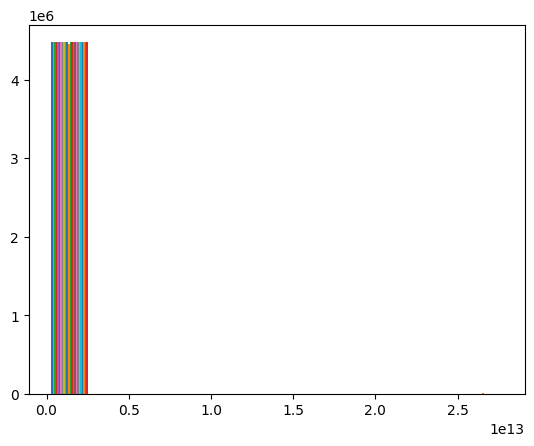

In [ ]:
plt.hist(training_set)

#### Shapiro

In [ ]:
stat, pvalue = shapiro(training_set)

# Print the results
print('Statistic:', stat)
print('p-value:', pvalue)

Statistic: 0.0045073628425598145
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### qqplot

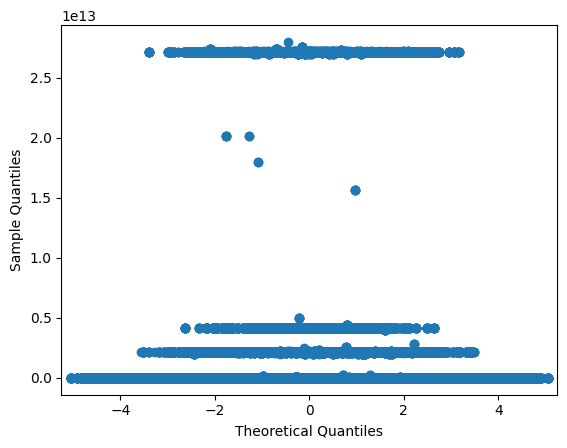

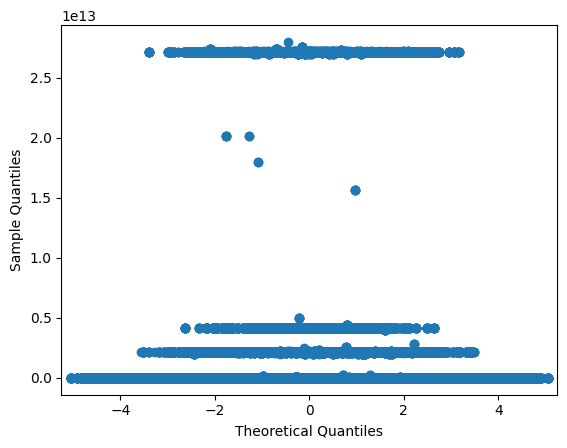

In [ ]:
sm.qqplot(training_set)

#### kstest

In [ ]:
kstest(training_set.values.flatten(), stats.norm.cdf)

KstestResult(statistic=0.6860622111179535, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)

#### Scatter

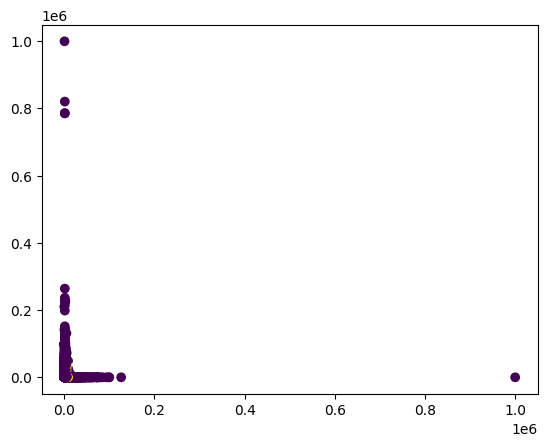

In [ ]:
plt.scatter(training_set['consommation_level_1'], training_set['consommation_level_2'], c=training_set['target'])

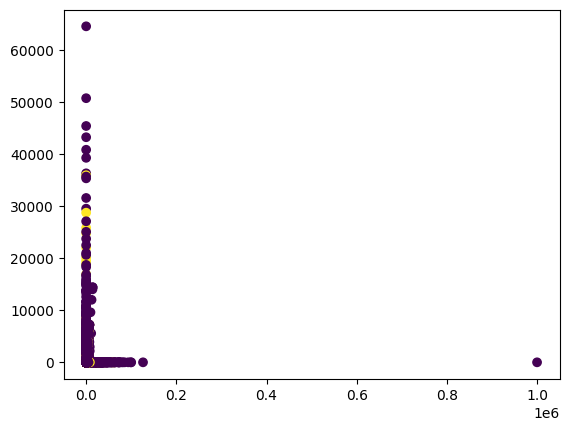

In [ ]:
plt.scatter(training_set['consommation_level_1'], training_set['consommation_level_3'], c=training_set['target'])

#### Conclusion
Through all of the previous tests, we can tell that the training set's not normally distributed.
Why?
* In the histogram:
  - The data is skewed to the right and not evenly distributed around the center
* in the shapiro:
  - The small p-value of the Shapiro-Wilk tells that the data is not normally distributed.
* in the qqplot:

  - The points deviate from the line, which tells that the data isn't normally distributed. The normally distributed data falls along the line
* in the ktest
  - The statistic value is 0.68606, which is a relatively large value. The pvalue value is zero, which means that the probability of obtaining the observed difference in the samples by chance is very small. The statistic_location value is 3, which means that the difference between the two samples is at the 3rd percentile. The statistic_sign value is -1, which means that the first sample is more likely to be drawn from a different distribution than the second sample.
  This result tells us that there's a significant difference between the distributions of the training set and a cumulative normal distributed points.

* in the scatter
  - The point are clustered together and not well distributed around the mean

### Test set

#### Histogram

(array([[1.939718e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.939718e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.939718e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.939718e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.939718e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.939718e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.00000

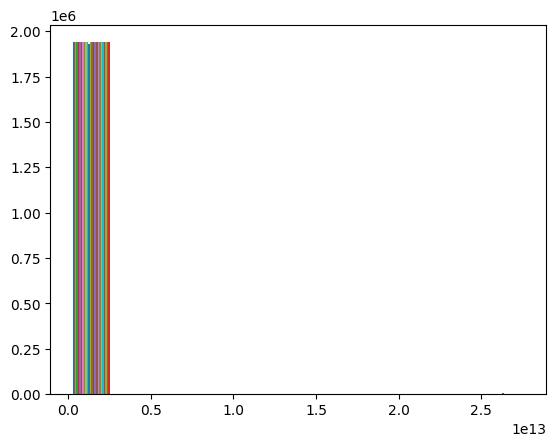

In [ ]:
plt.hist(test_set)

#### Shapiro

In [ ]:
stat, pvalue = shapiro(test_set)

# Print the results
print('Statistic:', stat)
print('p-value:', pvalue)

Statistic: 0.0037897825241088867
p-value: 0.0


#### qqplot

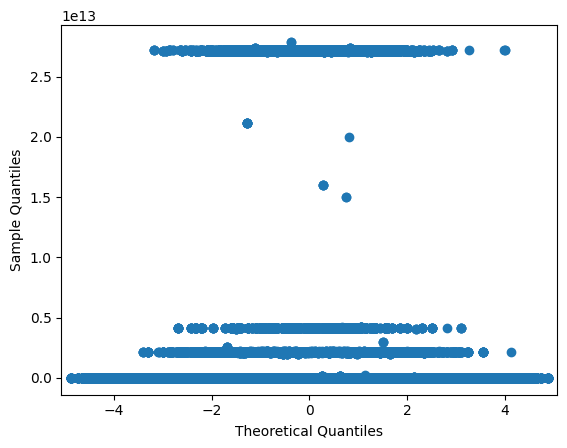

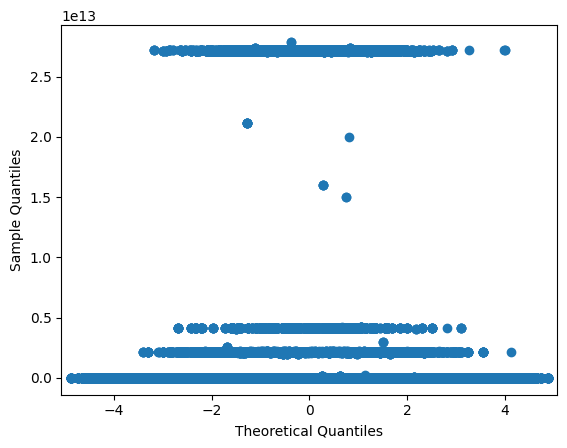

In [ ]:
sm.qqplot(test_set)

#### kstest

In [ ]:
kstest(test_set.values.flatten(), stats.norm.cdf)

KstestResult(statistic=0.6861460206190879, pvalue=0.0, statistic_location=3, statistic_sign=-1)

#### Scatter

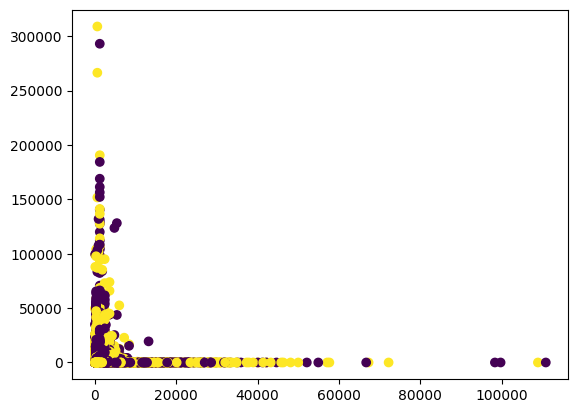

In [ ]:
plt.scatter(test_set['consommation_level_1'], test_set['consommation_level_2'], c=test_set['target'])

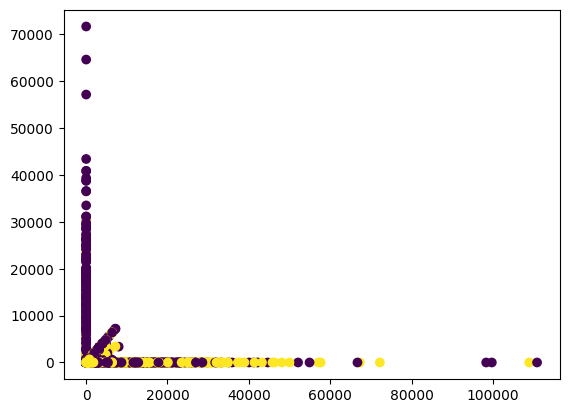

In [ ]:
plt.scatter(test_set['consommation_level_1'], test_set['consommation_level_3'], c=test_set['target'])

#### Conclusion
Through all of the previous tests, we can tell that the training set's not normally distributed.
Why?
* In the histogram:
  - The data is skewed to the right and not evenly distributed around the center
* in the shapiro:
  - The small p-value of the Shapiro-Wilk tells that the data is not normally distributed.
* in the qqplot:

  - The points deviate from the line, which tells that the data isn't normally distributed. The normally distributed data falls along the line
* in the ktest
  - The statistic value is 0.68614, which is a relatively large value. The pvalue value is zero, which means that the probability of obtaining the observed difference in the samples by chance is very small. The statistic_location value is 3, which means that the difference between the two samples is at the 3rd percentile. The statistic_sign value is -1, which means that the first sample is more likely to be drawn from a different distribution than the second sample.
  This result tells us that there's a significant difference between the distributions of the training set and a cumulative normal distributed points.

* in the scatter
  - The point are clustered together and not well distributed around the mean

### Conclusion
The previous done test tells us that both training and test sets are both not normally distributed.
The next question is that, are training and test sets both have the same distribution?


Why we care?

Before training the model we have to make sure that both training set and test set have the same distributions so we can evaluate the models correctly.

So we will check this out, if they have the same distribution we will start solving the distribution issue in each one of them separately, if not, we will combine them first and then try to split them so they both have the same distribution.

How can we do so?
We will do this using the previous results and doing `kstest` between both of them.

In [ ]:
kstest(test_set.values.flatten(), training_set.values.flatten())

KstestResult(statistic=0.01769457759927584, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Based on the results, we can conclude the following:

- The distributions of the training and test sets are statistically different according to the `kstest`. This is because the ***p-value*** (0.0) is very low.
- The maximum difference between the CDFs of the two samples is relatively small (0.0176).

A solution for this matter maybe merging the two sets and processing them together then splitting them. However, before doing so we will check two things:
1. whether or not they have the same distribution for classes
2. Whether or not standarizing the, separately can solve this matter

### Solve Different Distribution Issue

To solve this issue will do the following:
1. Standardize each set separately to avoid information leakage, avoid large values that harm the model
2. Resample the data to solve the imbalance problem


#### Checking Distribution of Classes

In [ ]:
print('Training set shape')
trainingSize = training_set.shape[0]
trainingClass0 = training_set[training_set['target'] == 0].shape[0]
trainingClass1 = training_set[training_set['target'] == 1].shape[0]

print(f"Training set size: {trainingSize}")

print(f"Training set class 0 samples: {trainingClass0}")
print(f"Training set class 1 samples: {trainingClass1}")

print(f"Training set class 0 proportion: {trainingClass0 / trainingSize * 100}")
print(f"Training set class 1 proportion: {trainingClass1 / trainingSize * 100}")

print('--------------------------')

print('Testing set shape')
testSize = test_set.shape[0]
testClass0 = test_set[test_set['target'] == 0].shape[0]
testClass1 = test_set[test_set['target'] == 1].shape[0]

print(f"Testing set size: {testSize}")

print(f"Testing set class 0 samples: {testClass0}")
print(f"Testing set class 1 samples: {testClass1}")

print(f"Testing set class 0 proportion: {testClass0 / testSize * 100}")
print(f"Testing set class 1 proportion: {testClass1 / testSize * 100}")

Training set shape
Training set size: 4476670
Training set class 0 samples: 4123560
Training set class 1 samples: 353110
Training set class 0 proportion: 92.11221734012112
Training set class 1 proportion: 7.887782659878884
--------------------------
Testing set shape
Training set size: 1939718
Training set class 0 samples: 967753
Training set class 1 samples: 971965
Training set class 0 proportion: 49.89142751678337
Training set class 1 proportion: 50.108572483216626


#### Standarizing the Data & Checking Its Distribution

Before standardizing the data, it's worth noting that not all features may not require this as they're not too large or abnormally big like months, years, days, and of course the target so the first thing to be done it checking which sould be normalized and shouldn't be.

In [ ]:
training_set.describe()

,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,target,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
count,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,...,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06
mean,6.348249e+01,2.012735e+03,6.273780e+00,1.466323e+01,1.999037e+03,7.361081e+00,1.788531e+01,1.194383e+01,2.103581e+02,7.887783e-02,...,7.319705e+00,1.003000e+00,4.109867e+02,1.093198e+02,2.030656e+01,5.292682e+01,1.776721e+04,1.834976e+04,4.466907e+01,6.878662e-01
std,3.273413e+00,4.104347e+00,3.432977e+00,8.583394e+00,1.058994e+01,3.478808e+00,8.701004e+00,6.022504e+00,1.035829e+02,2.695480e-01,...,1.359127e+00,3.079906e-01,7.573127e+02,1.220132e+03,1.574253e+02,8.754802e+02,4.036718e+04,4.095343e+04,3.127037e+03,4.633642e-01
min,6.000000e+01,1.977000e+03,1.000000e+00,1.000000e+00,1.977000e+03,1.000000e+00,1.000000e+00,1.100000e+01,1.010000e+02,0.000000e+00,...,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,2.010000e+03,3.000000e+00,7.000000e+00,1.991000e+03,4.000000e+00,1.100000e+01,1.100000e+01,1.030000e+02,0.000000e+00,...,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.057000e+03,4.000000e+00,0.000000e+00
50%,6.200000e+01,2.013000e+03,6.000000e+00,1.400000e+01,2.001000e+03,8.000000e+00,1.800000e+01,1.100000e+01,3.010000e+02,0.000000e+00,...,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,1.000000e+00
75%,6.300000e+01,2.016000e+03,9.000000e+00,2.200000e+01,2.008000e+03,1.100000e+01,2.600000e+01,1.100000e+01,3.090000e+02,0.000000e+00,...,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,1.000000e+00
max,6.900000e+01,2.019000e+03,1.200000e+01,3.100000e+01,2.019000e+03,1.200000e+01,3.100000e+01,5.100000e+01,3.990000e+02,1.000000e+00,...,9.000000e+00,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,1.000000e+00


AS we can see in the table above, we have ***counter_number*** and ***counter_code***, both are not useful information for the model. And also, we can see that the fearures that has a large values is only the ***consommation_levels***, old_index, and new_index features so these will be the only one to be normalized

In [ ]:
# Dropping counter_number and counter_code
test_set = test_set.drop(columns=['counter_code', 'counter_number'])
training_set = training_set.drop(columns=['counter_code', 'counter_number'])

In [ ]:
consommation_levels = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index']

standarizedTrain = training_set
standarizedtest = test_set

trainScaler = StandardScaler()
testScaler = StandardScaler()

standarizedTrain[consommation_levels] = pd.DataFrame(trainScaler.fit_transform(training_set[consommation_levels]), columns=consommation_levels)
standarizedtest[consommation_levels] = pd.DataFrame(testScaler.fit_transform(test_set[consommation_levels]), columns=consommation_levels)

In [ ]:
training_set.describe()

,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,target,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
count,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,4.476670e+06,...,4.476670e+06,4.476670e+06,4.476591e+06,4.476591e+06,4.476591e+06,4.476591e+06,4.476591e+06,4.476591e+06,4.476670e+06,4.476670e+06
mean,6.348249e+01,2.012735e+03,6.273780e+00,1.466323e+01,1.999037e+03,7.361081e+00,1.788531e+01,1.194383e+01,2.103581e+02,7.887783e-02,...,7.319705e+00,1.003000e+00,1.916108e-06,3.133025e-07,1.592412e-06,1.066864e-06,4.920182e-07,5.539379e-07,4.466907e+01,6.878662e-01
std,3.273413e+00,4.104347e+00,3.432977e+00,8.583394e+00,1.058994e+01,3.478808e+00,8.701004e+00,6.022504e+00,1.035829e+02,2.695480e-01,...,1.359127e+00,3.079906e-01,1.000007e+00,1.000009e+00,1.000008e+00,1.000009e+00,1.000008e+00,1.000008e+00,3.127037e+03,4.633642e-01
min,6.000000e+01,1.977000e+03,1.000000e+00,1.000000e+00,1.977000e+03,1.000000e+00,1.000000e+00,1.100000e+01,1.010000e+02,0.000000e+00,...,6.000000e+00,0.000000e+00,-5.426909e-01,-8.959675e-02,-1.289917e-01,-6.045462e-02,-4.401400e-01,-4.480642e-01,0.000000e+00,0.000000e+00
25%,6.200000e+01,2.010000e+03,3.000000e+00,7.000000e+00,1.991000e+03,4.000000e+00,1.100000e+01,1.100000e+01,1.030000e+02,0.000000e+00,...,6.000000e+00,1.000000e+00,-4.383747e-01,-8.959675e-02,-1.289917e-01,-6.045462e-02,-3.957722e-01,-3.978364e-01,4.000000e+00,0.000000e+00
50%,6.200000e+01,2.013000e+03,6.000000e+00,1.400000e+01,2.001000e+03,8.000000e+00,1.800000e+01,1.100000e+01,3.010000e+02,0.000000e+00,...,8.000000e+00,1.000000e+00,-1.808853e-01,-8.959675e-02,-1.289917e-01,-6.045462e-02,-2.496386e-01,-2.480321e-01,4.000000e+00,1.000000e+00
75%,6.300000e+01,2.016000e+03,9.000000e+00,2.200000e+01,2.008000e+03,1.100000e+01,2.600000e+01,1.100000e+01,3.090000e+02,0.000000e+00,...,9.000000e+00,1.000000e+00,2.495842e-01,-8.959675e-02,-1.289917e-01,-6.045462e-02,9.643464e-02,9.750674e-02,4.000000e+00,1.000000e+00
max,6.900000e+01,2.019000e+03,1.200000e+01,3.100000e+01,2.019000e+03,1.200000e+01,3.100000e+01,5.100000e+01,3.990000e+02,1.000000e+00,...,9.000000e+00,5.000000e+01,1.319797e+03,8.187342e+02,4.095384e+02,6.258202e+02,6.893009e+01,6.965527e+01,6.366240e+05,1.000000e+00


In [ ]:
kstest(standarizedTrain.values.flatten(), standarizedtest.values.flatten())

KstestResult(statistic=0.04492403268507489, pvalue=0.0, statistic_location=-0.06107437602635938, statistic_sign=-1)

Based on the results, we can conclude the following:

- The distributions of the training and test set after standariation are statistically different according to the `kstest`. This is because the ***p-value*** (0.0) is very low.
- The maximum difference between the CDFs of the two samples is moderate (0.0449). Additionally, the negative value in ***statistic_location*** and positive value in ***statistic_sign*** suggest this difference is concentrated in the left tail of the training set distribution compared to the test set. In other words, the training set distribution tends to have more probability mass for lower values compared to the test set distribution.

The results of this test tell that the distribution of both set is completely different whether it's for the classes samples distribution and the data itself. So, first we will combine both sets and do some preprocessing to solve this matter and while on the way we will do some feature selection as well.

#### Solve distribution issue using sampling
Will use the normalized data for the next steps as we want to the normally distributed sets

In [ ]:
dataset = pd.concat([standarizedTrain, standarizedtest], ignore_index=True)

In [ ]:
dataset.shape

(6416388, 22)

In [ ]:
dataset.head()

,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,target,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,2014,3,24,1994,12,31,11,101,0.0,...,8,1,-0.434413,-0.089597,-0.128992,-0.060455,-0.085842,-0.096836,4,1
1,60,2013,3,29,1994,12,31,11,101,0.0,...,6,1,1.041859,0.061207,-0.128992,-0.060455,-0.135586,-0.114075,4,1
2,60,2015,3,23,1994,12,31,11,101,0.0,...,8,1,-0.380275,-0.089597,-0.128992,-0.060455,-0.077865,-0.087972,4,1
3,60,2015,7,13,1994,12,31,11,101,0.0,...,8,1,-0.408004,-0.089597,-0.128992,-0.060455,-0.074818,-0.085482,4,1
4,60,2016,11,17,1994,12,31,11,101,0.0,...,9,1,0.212611,-0.089597,-0.128992,-0.060455,-0.066916,-0.066216,12,1


The first thing to solve the distribution issues is checking the proportion of both classes in the while datatset

In [ ]:
Size = dataset.shape[0]
Class0 = dataset[dataset['target'] == 0].shape[0]
Class1 = dataset[dataset['target'] == 1].shape[0]

print(f"Dataset set size: {Size}")

print(f"Dataset set class 0 samples: {Class0}")
print(f"Dataset set class 1 samples: {Class1}")

print(f"Dataset set class 0 proportion: {Class0 / Size * 100}")
print(f"Dataset set class 1 proportion: {Class1 / Size * 100}")

Dataset set size: 6416388
Dataset set class 0 samples: 5091313
Dataset set class 1 samples: 1325075
Dataset set class 0 proportion: 79.3485836579708
Dataset set class 1 proportion: 20.65141634202919


As it stands class 0 size is around 5.09 million samples which is around 80% of the dataset where class one is only 1.3 million samples which is around 20% of the dataset.
Since the gap between them is massive, to solve this issue, we'll use sampling.

We suggest that the best thing is using undersampling on class 0 as using oversampling on class 1 may result in duplicates or cloning samples with no useful information which may harm the model performance.

In [ ]:
X = dataset
X = dataset.drop(columns=['target'])

Y = dataset['target']

sampler = RandomUnderSampler(random_state=10)
X_resampled, y_resampled = sampler.fit_resample(X, Y)

Checking results

In [ ]:
Size = X_resampled.shape[0]
Class0 = y_resampled[y_resampled==0].shape[0]
Class1 = y_resampled[y_resampled==1].shape[0]

print(f"Dataset set size: {Size}")

print(f"Dataset set class 0 samples: {Class0}")
print(f"Dataset set class 1 samples: {Class1}")

print(f"Dataset set class 0 proportion: {Class0 / Size * 100}")
print(f"Dataset set class 1 proportion: {Class1 / Size * 100}")

Dataset set size: 2650150
Dataset set class 0 samples: 1325075
Dataset set class 1 samples: 1325075
Dataset set class 0 proportion: 50.0
Dataset set class 1 proportion: 50.0


Now that we've done so let's split the data again and check their distributions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
training_set = pd.DataFrame(X_train, columns=list(dataset.drop(columns=['target']).columns))
training_set.insert(0, 'target', y_train)

test_set = pd.DataFrame(X_test, columns=list(dataset.drop(columns=['target']).columns))
test_set.insert(0, 'target', y_test)

In [ ]:
training_set.head()

,target,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
157089,0.0,62,2017,9,18,2012,7,7,11,301,...,9,1,0.513676,0.238237,1.662334,-0.060455,-0.124116,-0.100377,4,1
382871,0.0,63,2014,12,9,1990,3,27,11,311,...,9,1,1.524816,-0.107217,-0.091602,-0.061110,-0.268133,-0.246084,4,1
1984022,1.0,63,2018,7,12,1992,12,8,11,306,...,6,1,-0.617353,-0.107217,-0.091602,-0.061110,-0.396774,-0.400359,4,0
2050162,1.0,63,2014,9,10,2007,3,19,11,311,...,9,1,-0.464933,-0.107217,-0.091602,-0.061110,-0.194132,-0.200901,4,0
1269105,0.0,69,2012,7,13,2005,5,27,11,104,...,6,1,0.944145,-0.089597,-0.128992,-0.060455,-0.142026,-0.126724,4,1


In [ ]:
kstest(training_set.values.flatten(), test_set.values.flatten())

KstestResult(statistic=0.00012422109897725075, pvalue=0.9987443258031637, statistic_location=4.409917062154072, statistic_sign=1)

Based pn the result:

There is practically no statistically significant difference between the distributions of training and test sets based on the high ***p-value***. Which is a very positive outcome.

The significant decrease in the test statistic (from 0.0449 in the previous result to 0.000124 here) suggests that the combined approach of separate normalization and undersampling has been very successful in bringing the distributions of the training and test sets very close together.

### Feature selection

After solving the distribution issues we'll then proceed with feature selection. To do so we'll check the features relationship between each other to find the replicate features that provide no big information for the model and then try to get the best set of features useful.

,target,disrict,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day,client_catg,region,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
target,1.000000,0.035981,0.001748,-0.009615,-0.009703,-0.023473,0.004072,0.001617,0.046012,0.013437,...,0.004013,-0.005899,0.003455,0.003679,0.012153,0.006576,0.014503,0.014301,0.000559,-0.006058
disrict,0.035981,1.000000,0.040417,-0.018193,-0.054700,0.163762,0.002696,-0.012753,0.036356,-0.341061,...,0.049712,-0.004981,0.026500,-0.005682,0.018203,0.014873,-0.007179,-0.006571,-0.003711,-0.069433
invoice_year,0.001748,0.040417,1.000000,-0.068226,-0.039394,0.282659,-0.022438,-0.034916,0.044773,0.025446,...,0.556657,-0.001137,-0.011308,-0.040528,0.100332,0.059122,0.054112,0.054272,0.004805,-0.079494
invoice_month,-0.009615,-0.018193,-0.068226,1.000000,-0.021004,-0.011792,0.002596,0.003407,-0.135317,0.040823,...,-0.026518,-0.005950,-0.009960,-0.017988,-0.010852,-0.030571,-0.082254,-0.083076,-0.011734,0.013020
invoice_day,-0.009703,-0.054700,-0.039394,-0.021004,1.000000,-0.054949,-0.002286,0.013581,-0.140149,0.052145,...,-0.030309,-0.005930,-0.006577,-0.023495,-0.023331,-0.033978,-0.081190,-0.082366,-0.012166,0.011231
creation_year,-0.023473,0.163762,0.282659,-0.011792,-0.054949,1.000000,-0.084461,-0.045905,0.058316,-0.036608,...,0.226311,-0.003592,-0.007294,0.005047,0.052739,0.046540,-0.099621,-0.095973,0.001823,-0.022515
creation_month,0.004072,0.002696,-0.022438,0.002596,-0.002286,-0.084461,1.000000,0.051961,-0.012671,0.010781,...,-0.015046,0.005255,0.006402,0.001522,-0.007271,-0.004714,-0.001963,-0.002523,-0.005035,-0.003494
creation_day,0.001617,-0.012753,-0.034916,0.003407,0.013581,-0.045905,0.051961,1.000000,0.003164,0.094554,...,-0.027402,0.005378,0.002762,-0.002185,-0.004364,-0.003253,-0.000940,0.000026,0.008921,-0.000588
client_catg,0.046012,0.036356,0.044773,-0.135317,-0.140149,0.058316,-0.012671,0.003164,1.000000,-0.044047,...,0.079248,0.037171,0.069293,0.143950,0.089254,0.195469,0.439234,0.446612,0.070714,0.002081
region,0.013437,-0.341061,0.025446,0.040823,0.052145,-0.036608,0.010781,0.094554,-0.044047,1.000000,...,-0.019519,0.000754,-0.031933,-0.044248,-0.043046,-0.036178,-0.069771,-0.070341,0.000966,0.044311


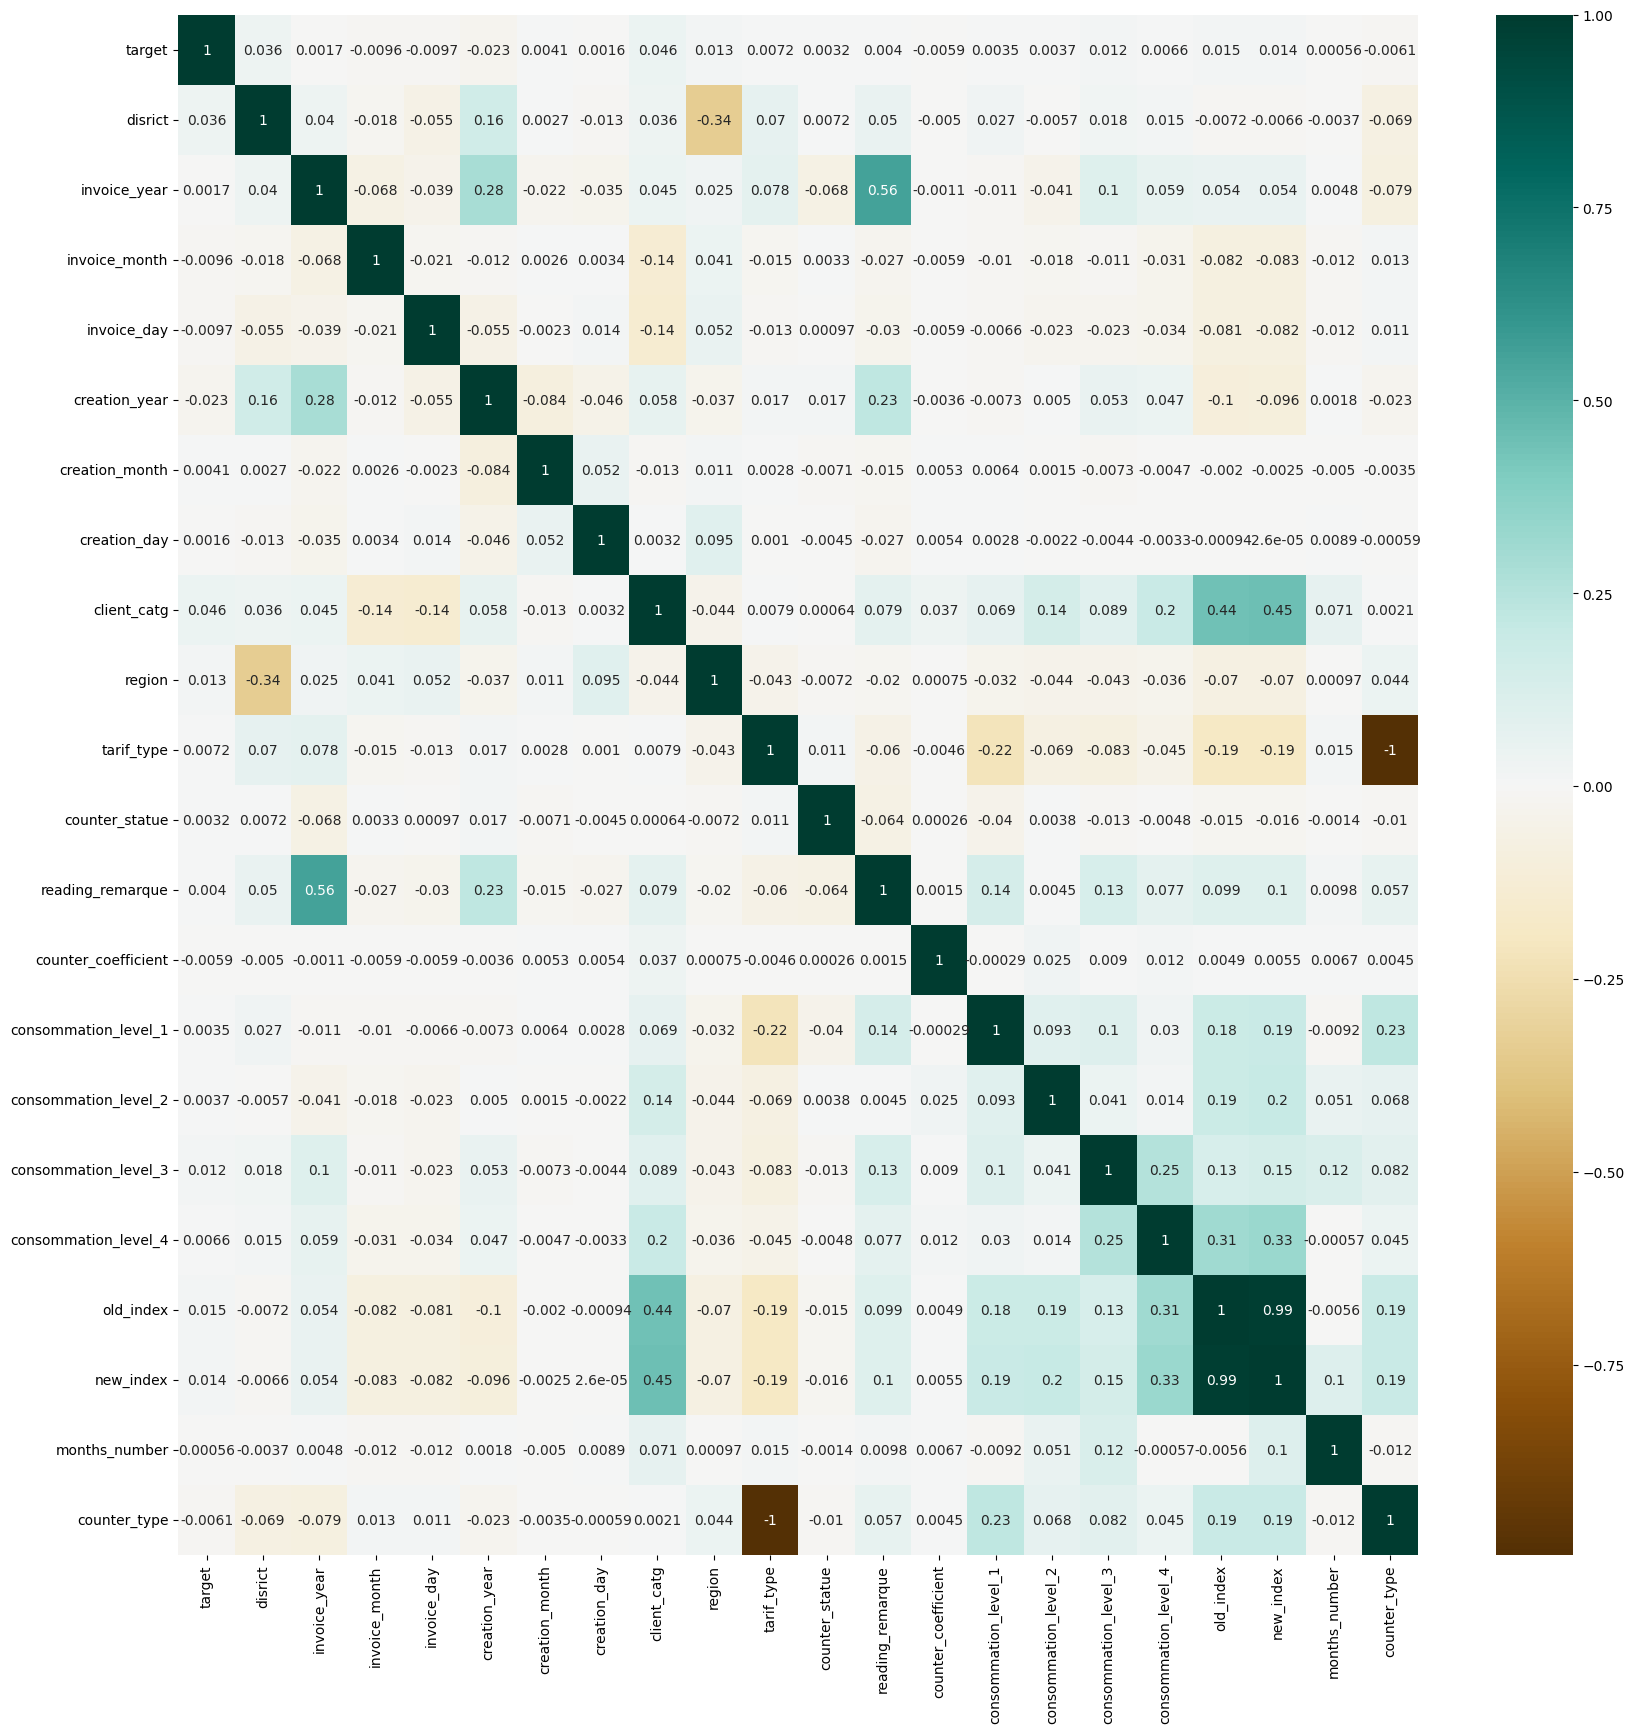

In [ ]:
plt.figure(figsize=(20, 20))
c = training_set.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

This results suggests that the old_index and new_index features probably provide similar information so we will remove old_index and then select top 10 features to be used in the model. We'll use ***SelectKBest*** for feature selection and ***f_classif*** for calculating the importance of each feature

In [ ]:
test_set = test_set.drop(columns=['old_index'])
training_set = training_set.drop(columns=['old_index'])

In [ ]:
test_set.to_csv('/content/drive/MyDrive/GP Projects/Project01 - EDA/test set.csv', index=False)
training_set.to_csv('/content/drive/MyDrive/GP Projects/Project01 - EDA/training set.csv', index=False)